# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Dhity Rismawati
- **Email:** dhity.rismawati022gmail.com
- **ID Dicoding:** dhity_rismawati

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda dari tahun ke tahun?
- Bagaimana pola penyewaan sepeda berdasarkan musim?
- Apa hubungan antara kondisi cuaca dan jumlah penyewaan sepeda?
- Bagaimana perbandingan penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana penyewaan sepeda bervariasi berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [14]:
day_df = pd.read_csv(r"C:\Users\dhity\submission\data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
hour_df = pd.read_csv(r"C:\Users\dhity\submission\data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- membaca dua dataset, yaitu data per hari (day_df) dan data per jam (hour_df). dua Dataset ini memuat beberapa variabel penting terkait dengan penyewaan sepeda, termasuk dteday (tanggal), season (musim), holiday (hari libur), weekday (hari dalam seminggu), workingday (hari kerja), serta faktor cuaca seperti temp (suhu), hum (kelembapan), dan windspeed (kecepatan angin).
- Dataset day_df berisi data penyewaan sepeda yang dikumpulkan per hari, dengan variabel jumlah sepeda yang dipinjam oleh pengguna kasual (casual) dan terdaftar (registered), serta total penyewaan (cnt).
- Dataset hour_df mengandung data yang lebih granular, yaitu per jam. Ini memberikan detail lebih mendalam mengenai perilaku penyewaan selama jam tertentu dalam satu hari.
- Adanya variabel workingday, holiday, dan weekday memungkinkan untuk menganalisis pola penyewaan sepeda berdasarkan hari kerja, hari libur, dan akhir pekan.
- Variabel cuaca seperti temp dan hum juga bisa memberikan insight mengenai pengaruh kondisi cuaca terhadap aktivitas penyewaan sepeda.

### Assessing Data

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dua dataset tersebut(day_df dan hour_df) memiliki jenis kesalahan yang sama yaitu kesalahan pada tipe data untuk kolom dteday, kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). 
- dari kedua dataset tersebut juga tidak memiliki missing value maupun inaccurate value

### Cleaning Data

In [20]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Output dari proses ini mengubah nilai numerik menjadi label yang lebih deskriptif, seperti mengganti angka pada kolom bulan, musim, hari, dan kondisi cuaca dengan teks yang lebih mudah dipahami. Selain itu, tipe data kolom-kolom ini diubah menjadi tipe kategori untuk meningkatkan efisiensi dalam penyimpanan dan pengolahan data. Transformasi ini membantu mempercepat proses analisis sekaligus membuat data lebih mudah diinterpretasikan.

In [23]:
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubah tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Proses pembersihan kedua data mencakup pengubahan tipe data pada kolom dteday diubah menjadi tipe data datetime. Output dari proses ini mengubah nilai numerik menjadi label yang lebih deskriptif. Selain itu, tipe data kolom-kolom ini diubah menjadi tipe kategori untuk meningkatkan efisiensi dalam penyimpanan dan pengolahan data. Transformasi ini membantu mempercepat proses analisis sekaligus membuat data lebih mudah diinterpretasikan.

- Dengan meningkatkan kualitas data melalui penghilangan duplikat dan pengorganisasian format, analisis menjadi lebih akurat dan visualisasi hasil temuan menjadi lebih mudah.

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
trend_bike = day_df.groupby(by='yr').agg({
    'cnt': 'mean'
})

trend_bike.head()

,cnt
yr,
2011,3405.761644
2012,5599.934426


In [25]:
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

- **Musim Gugur**: Menunjukkan jumlah penyewaan tertinggi baik dalam hal maksimum, rata-rata, dan total. Ini menunjukkan bahwa musim gugur merupakan waktu yang populer bagi pengguna untuk menyewa sepeda.
- **Musim Panas**: Memiliki penyewaan yang cukup tinggi, dengan total penyewaan mendekati musim gugur, tetapi rata-ratanya sedikit lebih rendah. Ini mungkin disebabkan oleh aktivitas luar ruangan yang lebih tinggi di musim panas.
- **Musim Dingin**: Meskipun memiliki maksimum yang cukup baik, jumlah penyewaan secara keseluruhan lebih rendah, yang mungkin disebabkan oleh cuaca dingin yang kurang mendukung untuk bersepeda.
- **Musim Semi**: Menunjukkan penyewaan terendah dibandingkan dengan musim lainnya, baik dalam hal total maupun rata-rata. Hal ini menunjukkan bahwa pengguna mungkin kurang tertarik untuk menyewa sepeda pada awal tahun saat cuaca masih beralih dari dingin ke hangat.

In [26]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

- **Kondisi Cuaca Cerah**: Menjadi yang paling menguntungkan untuk penyewaan sepeda dengan jumlah tertinggi, rata-rata, dan total. Ini menunjukkan bahwa pengguna cenderung lebih memilih untuk menyewa sepeda saat cuaca baik.
- **Kondisi Cuaca Buruk (Hujan/Ringan Salju)**: Meskipun masih ada penyewaan, jumlahnya jauh lebih rendah dibandingkan dengan kondisi cuaca cerah. Hal ini menunjukkan bahwa cuaca buruk dapat berdampak negatif pada jumlah penyewaan sepeda.
- **Kondisi Berkabut atau Mendung**: Memiliki jumlah penyewaan yang lebih baik dibandingkan dengan cuaca buruk, tetapi tetap tidak sebaik saat cuaca cerah.

In [27]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
}).reindex (['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

cnt                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

**Hari Sabtu** memiliki jumlah penyewaan tertinggi, diikuti oleh Hari Jumat dan Hari Rabu, menunjukkan bahwa akhir pekan adalah waktu populer untuk menyewa sepeda.
**Hari Senin** mencatat penyewaan terendah, yang mungkin menunjukkan bahwa orang lebih sedikit menggunakan sepeda untuk aktivitas harian mereka setelah akhir pekan.

In [28]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
Holiday     8714  605  4330.168831
Workingday  8362   22  4584.820000

Hari Libur memiliki rata-rata penyewaan yang lebih rendah dibandingkan dengan Hari Kerja, meskipun jumlah penyewaan tertinggi tercatat pada hari libur. Rata-rata penyewaan pada hari kerja sedikit lebih tinggi, yang menunjukkan bahwa pengguna lebih banyak menggunakan sepeda untuk keperluan sehari-hari seperti pergi bekerja atau beraktivitas.

**Insight:**
- dari proses di atas, didapatkan bahawa terdapat tren kenaikan atau penurunan rata-rata penyewaan dari tahun ke tahun, Musim panas mungkin memiliki lebih banyak penyewaan dibandingkan musim dingin, Cuaca cerah meningkatkan penyewaan, sementara hujan dan kondisi buruk menguranginya, Penyewaan cenderung lebih tinggi di akhir pekan dibandingkan hari kerja, Ada perbedaan perilaku penyewaan antara hari kerja dan hari libur, dengan pengguna casual cenderung lebih aktif pada akhir pekan dan hari libur.
- dan hal tersebut akan divisualisasikan pada proses selanjutnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dari tahun ke tahun?

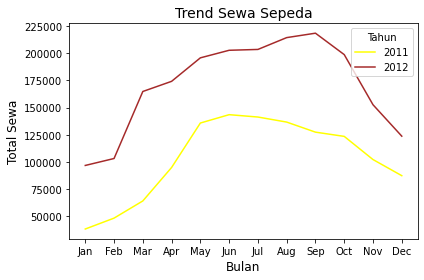

In [33]:
# Konversi 'mnth' menjadi kategori yang terurut
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

# Menghitung total 'cnt' per bulan dan tahun
monthly_counts = day_df.groupby(["mnth", "yr"])["cnt"].sum().reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",  
    y="cnt",   
    hue="yr",  
    palette=["yellow", "brown"]
)

# Memberikan judul dan penyesuaian pada plot
plt.title("Trend Sewa Sepeda", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Sewa", fontsize=12)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()  
plt.show()

Berdasarkan data dari 2011 dan 2012, tren penyewaan sepeda meningkat secara signifikan pada tahun 2012 dibandingkan dengan 2011. Kenaikan tertinggi terlihat pada pertengahan tahun, terutama pada bulan-bulan seperti Juli hingga September.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim?

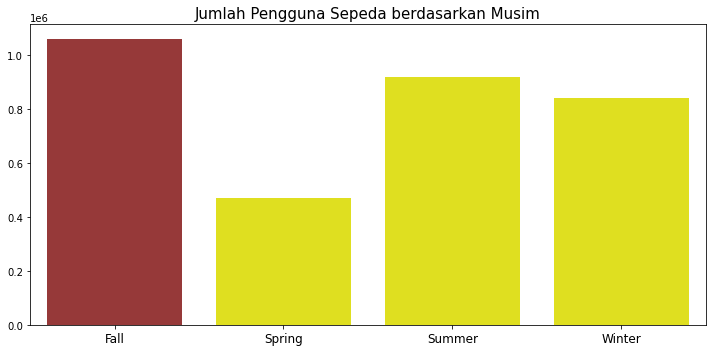

In [59]:
# Menghitung jumlah pengguna sepeda per musim
byseason_df = day_df.groupby(by="season").cnt.sum().reset_index()

# Mengganti nama kolom untuk memudahkan interpretasi
byseason_df.rename(columns={
    "cnt": "total_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

# Membuat bar plot jumlah pengguna sepeda berdasarkan musim
sns.barplot(
    y="total_count", 
    x="season",
    data=byseason_df.sort_values(by="total_count", ascending=False),
    palette=["brown", "yellow", "yellow", "yellow"]
)

# Menambahkan judul dan penyesuaian pada plot
plt.title("Jumlah Pengguna Sepeda berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.tight_layout()
plt.show()


Penyewaan sepeda cenderung meningkat pada musim panas dan musim gugur, dengan jumlah pengguna tertinggi tercatat pada musim-musim tersebut. Sebaliknya, musim semi memiliki jumlah penyewaan yang lebih rendah, dan musim dingin menjadi musim dengan penurunan penyewaan yang signifikan.

### Pertanyaan 3: Apa hubungan antara kondisi cuaca dan jumlah penyewaan sepeda?

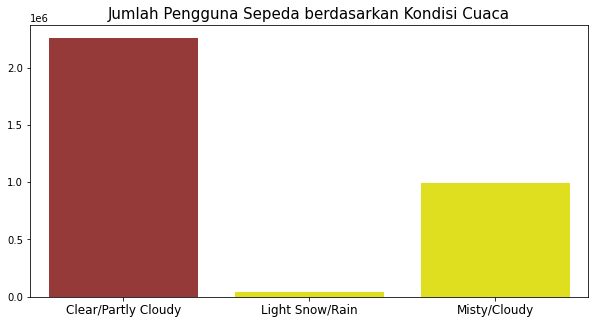

In [48]:
# Menghitung jumlah pengguna sepeda per kondisi cuaca
byweathersit_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()

# Mengganti nama kolom untuk memudahkan interpretasi
byweathersit_df.rename(columns={
    "cnt": "total_count"
}, inplace=True)

# Mengatur ukuran gambar
plt.figure(figsize=(10, 5))

# Membuat bar plot jumlah pengguna sepeda berdasarkan kondisi cuaca
sns.barplot(
    y="total_count", 
    x="weathersit",
    data=byweathersit_df.sort_values(by="total_count", ascending=False),
    palette=["brown", "yellow", "yellow"]
)

# Menambahkan judul dan penyesuaian pada plot
plt.title("Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


Sebagian besar pengguna sepeda melakukan penyewaan ketika kondisi cuaca cerah atau sedikit berawan. Jumlah penyewaan menurun ketika cuaca mendung atau hujan ringan, dan penyewaan paling sedikit terjadi saat cuaca buruk seperti badai atau hujan lebat.

### Pertanyaan 4: Bagaimana perbandingan penyewaan sepeda antara hari kerja dan hari libur?

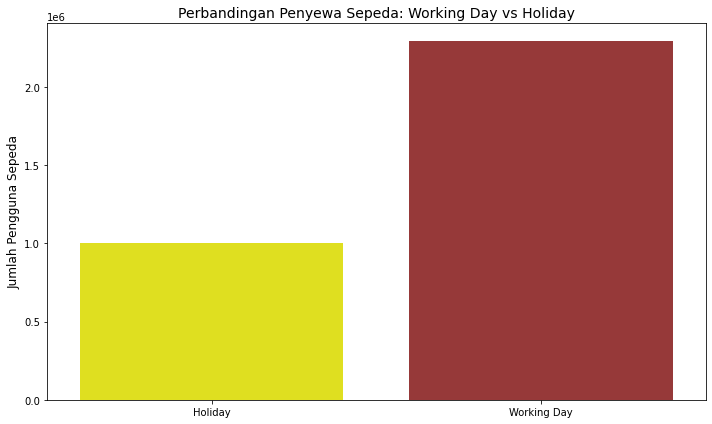

In [64]:
# Menghitung jumlah pengguna sepeda berdasarkan working day dan holiday
byworkingday_df = day_df.groupby(by="workingday").cnt.sum().reset_index()

# Mengganti nama kolom untuk memudahkan interpretasi
byworkingday_df.rename(columns={
    "cnt": "total_count"
}, inplace=True)

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat bar plot jumlah pengguna sepeda berdasarkan working day dan holiday
sns.barplot(
    x='workingday',  
    y='total_count',         
    data=byworkingday_df,    
    palette=["yellow", "brown"] 
)

# Menambahkan judul dan penyesuaian pada plot
plt.title('Perbandingan Penyewa Sepeda: Working Day vs Holiday', fontsize=14)
plt.xlabel(None)  
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12) 
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Working Day']) 
plt.tight_layout()
plt.show()



Jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan hari libur. Ini menunjukkan bahwa sepeda sering digunakan sebagai sarana transportasi untuk aktivitas harian seperti pergi bekerja atau sekolah pada hari kerja, sementara pada hari libur penggunaannya sedikit berkurang.

### Pertanyaan 5 : Bagaimana penyewaan sepeda bervariasi berdasarkan hari dalam seminggu?

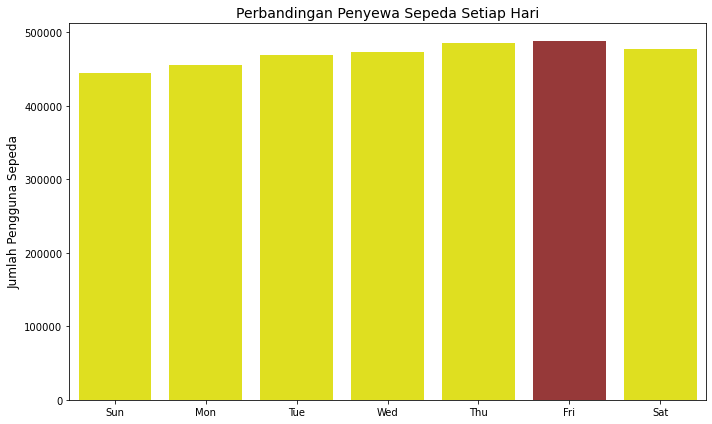

In [68]:
# Menghitung jumlah pengguna sepeda berdasarkan hari dalam seminggu
byweekday_df = day_df.groupby(by="weekday").cnt.sum().reset_index()

# Mengganti nama kolom untuk memudahkan interpretasi
byweekday_df.rename(columns={
    "cnt": "total_count"
}, inplace=True)

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat bar plot jumlah pengguna sepeda berdasarkan hari dalam seminggu
sns.barplot(
    x='weekday',  
    y='total_count',      
    data=byweekday_df,  
    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],  
    palette=["yellow", "yellow", "yellow", "yellow", "yellow", "brown", "yellow"]
)

# Menambahkan judul dan penyesuaian pada plot
plt.title('Perbandingan Penyewa Sepeda Setiap Hari', fontsize=14)
plt.xlabel(None)  
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.tight_layout()
plt.show()


Pengguna sepeda paling banyak ditemukan pada hari Jumat dan Sabtu, sementara hari Minggu menunjukkan jumlah penyewaan yang sedikit lebih rendah. Penyewaan meningkat secara bertahap sejak hari Senin dan mencapai puncaknya pada akhir minggu.

## Analisis Lanjutan (Opsional)

In [77]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengelompokkan data untuk menghitung RFM
rfm_df = day_df.groupby(by='instant', as_index=False).agg({
    'dteday': 'max',  # Mengambil tanggal penyewaan terakhir
    'cnt': 'sum'      # Menghitung total penyewaan
})

# Mengganti nama kolom
rfm_df.columns = ['instant', 'max_ride_timestamp', 'monetary']

# Menghitung frekuensi
rfm_df['frequency'] = day_df.groupby('instant')['cnt'].count().values

# Menghitung Recency
rfm_df['max_ride_timestamp'] = rfm_df['max_ride_timestamp'].dt.date
recent_date = day_df['dteday'].max().date()  # Tanggal terakhir penyewaan
rfm_df['recency'] = rfm_df['max_ride_timestamp'].apply(lambda x: (recent_date - x).days)

# Menghapus kolom max_ride_timestamp
rfm_df.drop('max_ride_timestamp', axis=1, inplace=True)

# Melihat hasil RFM
rfm_df.head()

,instant,monetary,frequency,recency
0,1,985,1,730
1,2,801,1,729
2,3,1349,1,728
3,4,1562,1,727
4,5,1600,1,726


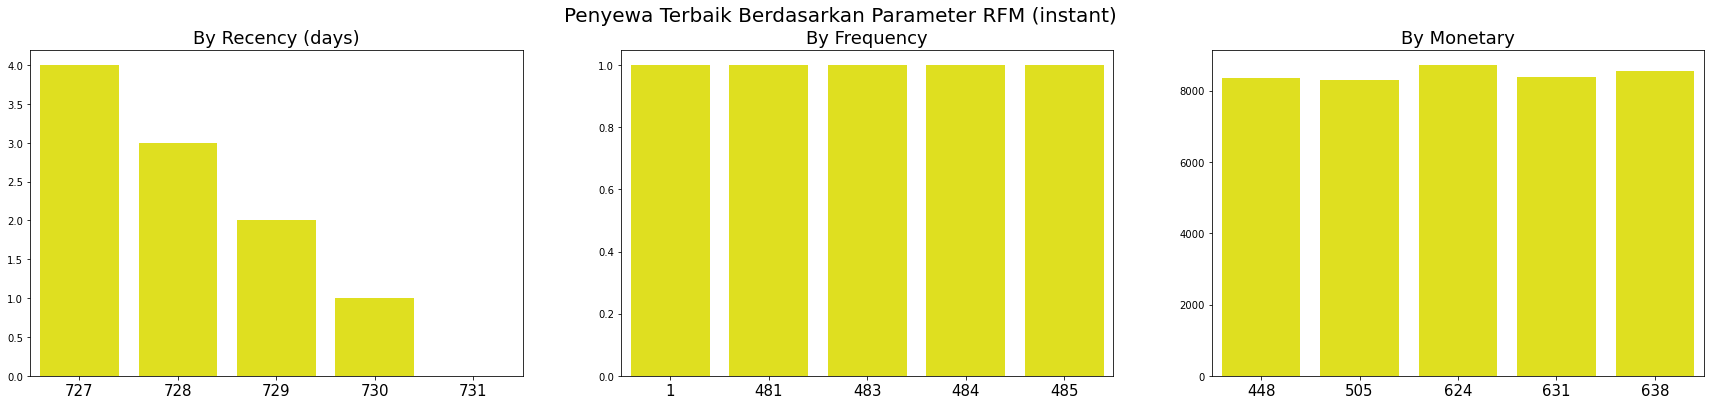

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["yellow"]

# Visualisasi Recency
sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Visualisasi Frequency
sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Visualisasi Monetary
sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Penyewa Terbaik Berdasarkan Parameter RFM (instant)", fontsize=20)
plt.show()



**insight**
- Nilai recency yang rendah menunjukkan bahwa banyak penyewa melakukan transaksi baru-baru ini, menandakan keberhasilan program pemasaran saat ini.
- Penyewa dengan frekuensi tinggi dianggap sebagai pengguna setia dan dapat menjadi duta merek, sedangkan penyewa dengan frekuensi rendah mungkin memerlukan pendekatan yang lebih spesifik untuk meningkatkan keterlibatan mereka.
- Penyewa dengan nilai monetary tinggi merupakan aset berharga bagi bisnis, sehingga penting untuk mengidentifikasi mereka dan menawarkan program loyalitas atau penghargaan.
- untuk strategi pemasaran, bisa diadakan program Penawaran khusus, seperti diskon untuk penyewa dengan recency tinggi dan frequency rendah, dapat dirancang untuk menarik kembali penyewa yang tidak aktif.

In [78]:
day_df.to_csv("C:/Users/dhity/Submission/data/all_day.csv", index=False)